## Rainfall Prediction using Flask

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set(style = 'whitegrid')
plt.style.use('fivethirtyeight')

#### Workflow
1. Data Collection
2. Exploratory Data Analysis
3. Data Preprocessing
4. Train Test Split
5. Model Training
6. Hyperparameter Tuning

In [ ]:
df = pd.read_csv('Datasets/Rainfall.csv')

#### We need to predict rainfall based on weather parameters such as temperature, humidity, wind speed, and atmospheric pressure.

In [6]:
df.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


### <b>Dataset Information<b>

In [8]:
# Shape of the dataset
df.shape

(366, 12)

In [9]:
# Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     366 non-null    int64  
 1   pressure                366 non-null    float64
 2   maxtemp                 366 non-null    float64
 3   temparature             366 non-null    float64
 4   mintemp                 366 non-null    float64
 5   dewpoint                366 non-null    float64
 6   humidity                366 non-null    int64  
 7   cloud                   366 non-null    int64  
 8   rainfall                366 non-null    object 
 9   sunshine                366 non-null    float64
 10           winddirection  365 non-null    float64
 11  windspeed               365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [21]:
# Removing extra spaces in all columns
df.columns = df.columns.str.strip()
df.columns

Index(['day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity', 'cloud', 'rainfall', 'sunshine', 'winddirection',
       'windspeed'],
      dtype='object')

In [19]:
# We need to predict whether if it rains or not
df['rainfall'].unique()

array(['yes', 'no'], dtype=object)

In [25]:
df['day'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [27]:
# Day column doesn't have much significance in predicting rainfall, so we will drop it.
df.drop(columns = ['day'], inplace = True)

In [35]:
# Checking for missing Values
df.isnull().sum()

pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    1
windspeed        1
dtype: int64

#### Handling missing values

In [47]:
df['winddirection'] = df['winddirection'].fillna(df['winddirection'].mode()[0])

In [41]:
df['windspeed'] = df['windspeed'].fillna(df['windspeed'].median())

In [43]:
df.isnull().sum()

pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    0
windspeed        0
dtype: int64

#### Converting the yes and no values to 1 and 0 in Rainfall column

In [50]:
df['rainfall'] = df['rainfall'].map({"yes" : 1, "no" : 0})

In [54]:
df['rainfall'].value_counts()

rainfall
1    249
0    117
Name: count, dtype: int64

### <b>Exploratory Data Analysis<b>

In [60]:
# Setting plot style for all the plots
sns.set(style = 'whitegrid')

In [64]:
# Statistics of Dataset
df.describe()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,1013.742623,26.191257,23.747268,21.894536,19.989071,80.177596,71.128415,0.680328,4.419399,101.284153,21.534153
std,6.414776,5.978343,5.632813,5.594153,5.997021,10.062470,21.798012,0.466988,3.934398,81.722827,10.056054
min,998.500000,7.100000,4.900000,3.100000,-0.400000,36.000000,0.000000,0.000000,0.000000,10.000000,4.400000
25%,1008.500000,21.200000,18.825000,17.125000,16.125000,75.000000,58.000000,0.000000,0.500000,40.000000,13.725000
50%,1013.000000,27.750000,25.450000,23.700000,21.950000,80.500000,80.000000,1.000000,3.500000,70.000000,20.500000
75%,1018.100000,31.200000,28.600000,26.575000,25.000000,87.000000,88.000000,1.000000,8.200000,190.000000,27.825000
max,1034.600000,36.300000,32.400000,30.000000,26.700000,98.000000,100.000000,1.000000,12.100000,350.000000,59.500000


In [66]:
df.columns

Index(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity',
       'cloud', 'rainfall', 'sunshine', 'winddirection', 'windspeed'],
      dtype='object')

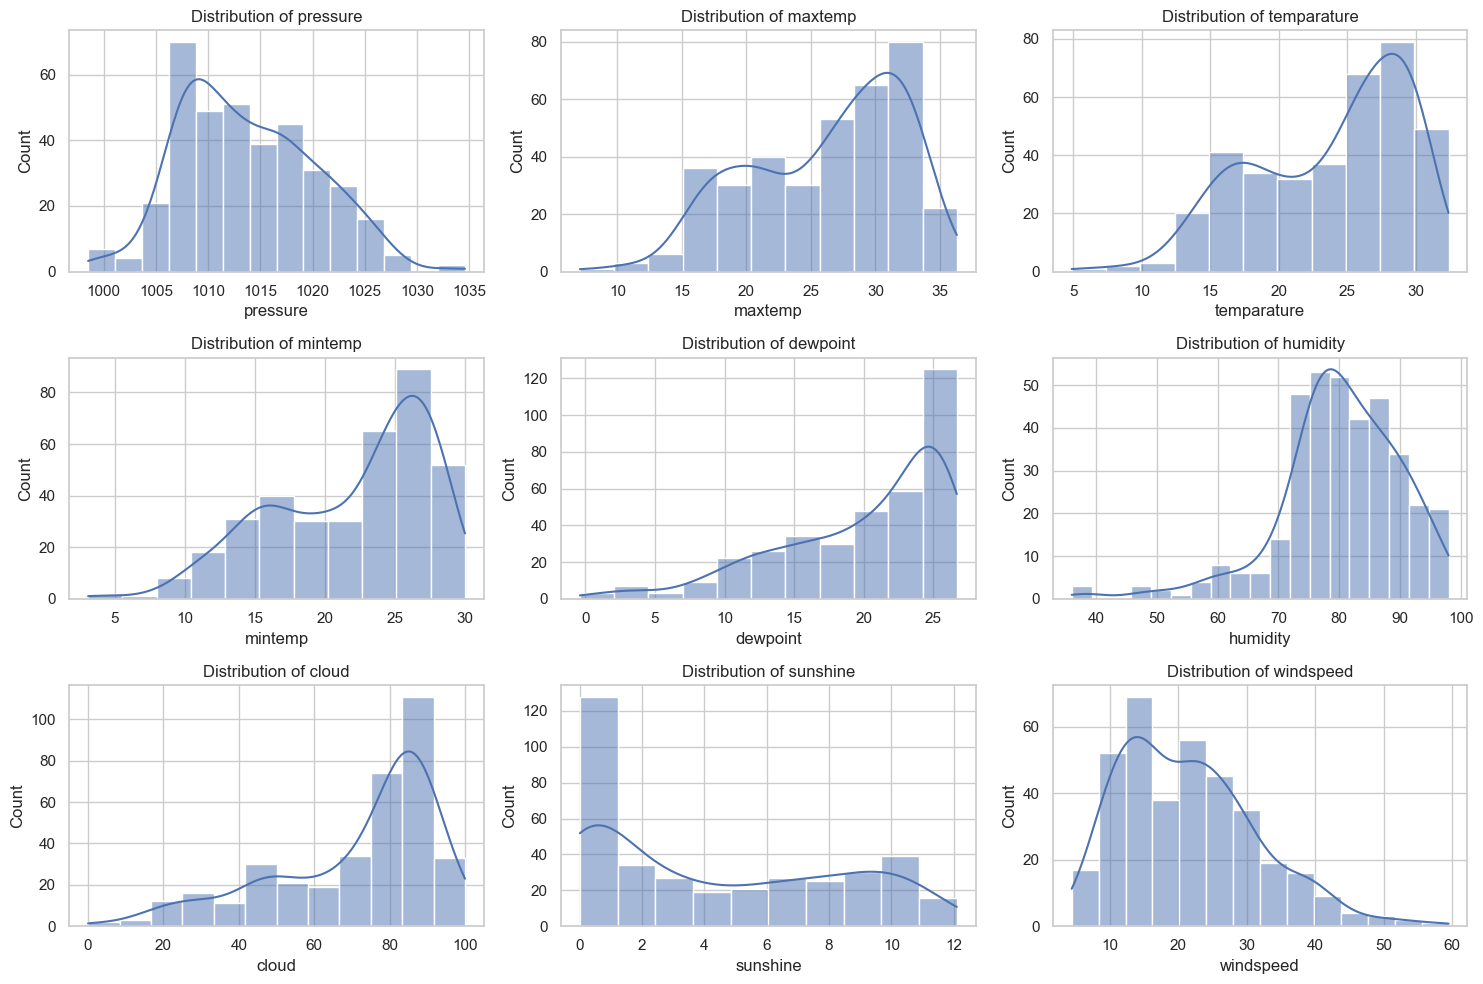

In [80]:
# Distribution of all numerical columns
plt.figure(figsize = (15, 10))

for i, column in enumerate(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity','cloud', 'sunshine', 'windspeed'], 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[column], kde = True)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

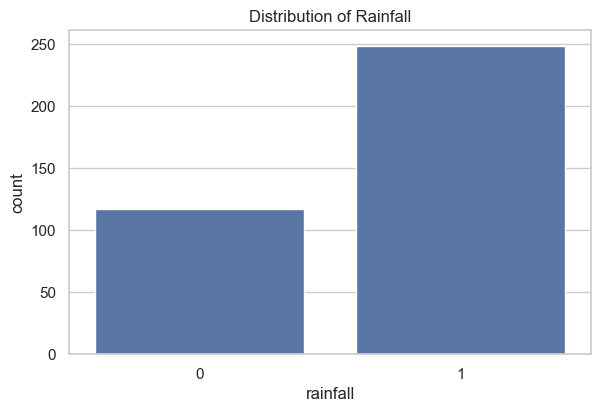

In [74]:
plt.figure(figsize = (6, 4))
sns.countplot(x = 'rainfall', data = df)
plt.title("Distribution of Rainfall")
plt.show()

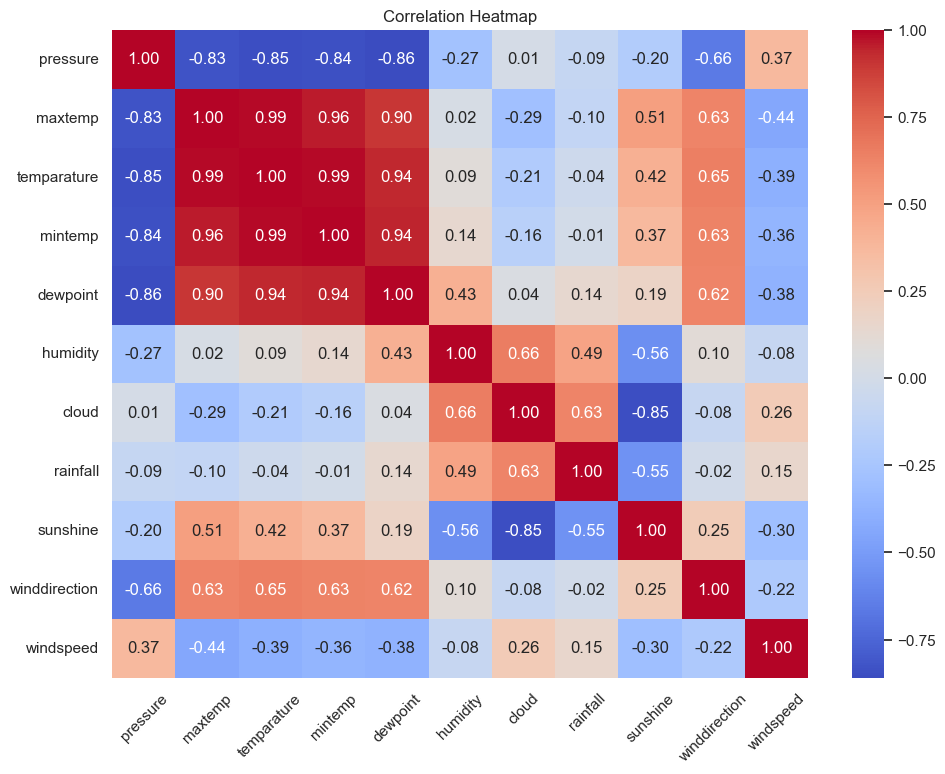

In [78]:
# Correlation Matrix
plt.figure(figsize = (10, 8))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm', fmt = ".2f")
plt.title("Correlation Heatmap")
plt.xticks(rotation = 45)
plt.show()

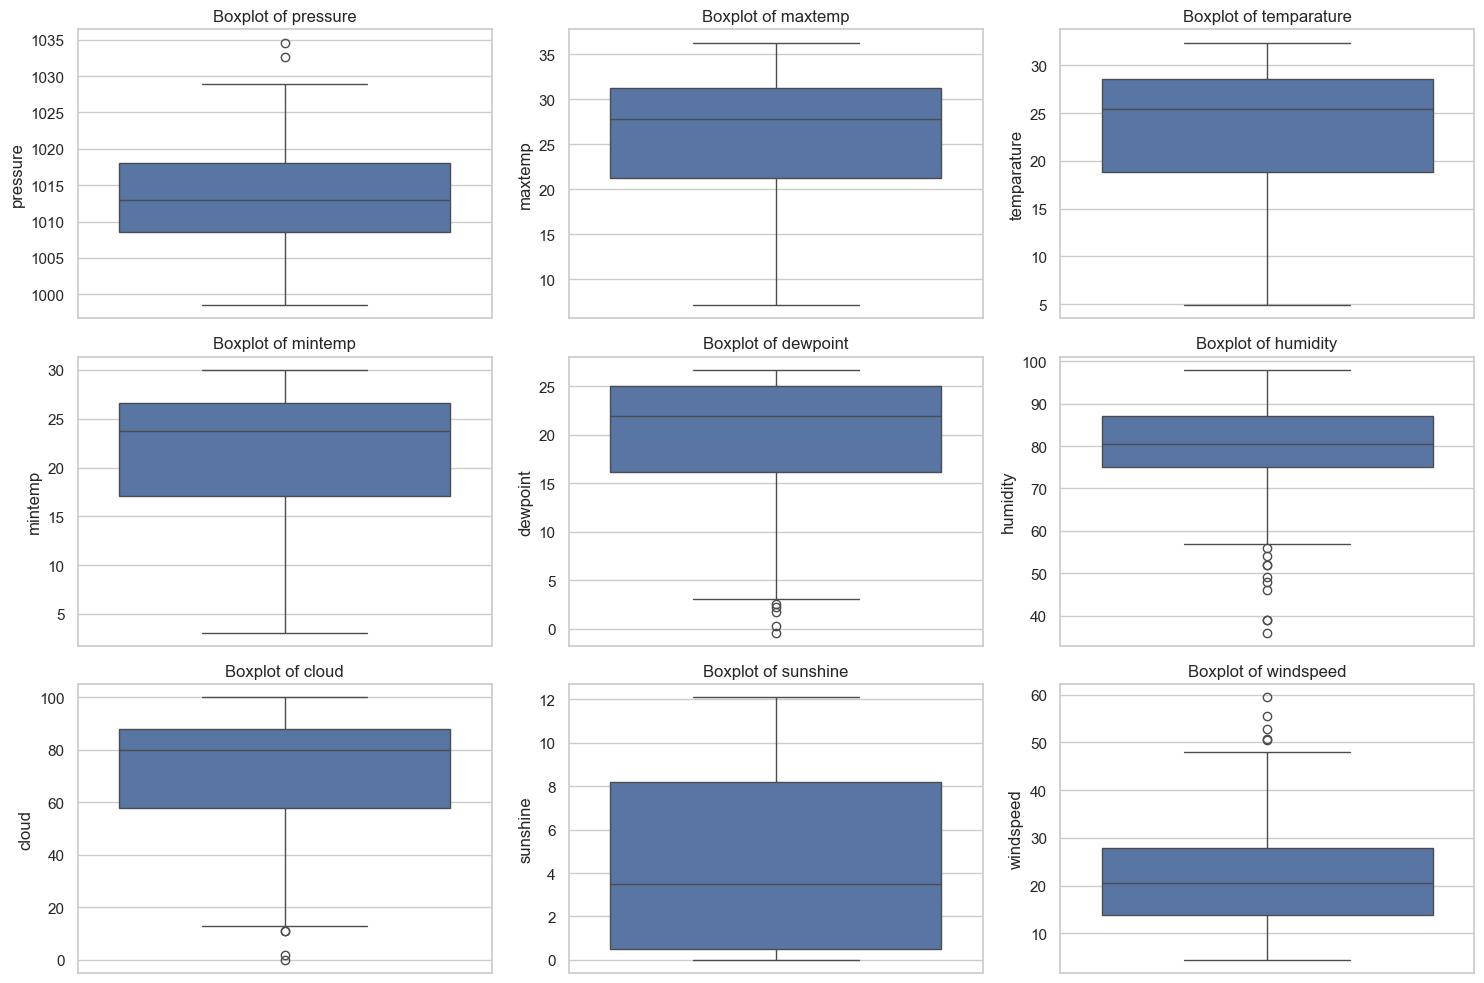

In [82]:
# Plotting boxplot to understand outliers
plt.figure(figsize = (15, 10))

for i, column in enumerate(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity','cloud', 'sunshine', 'windspeed'], 1):
    plt.subplot(3, 3, i)
    sns.boxplot(df[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

### <b>Data Preprocessing <b>

Multicollinearity is a statistical concept where several independent variables in a model are correlated. <br>
To manage multicollinearity, we will drop all multi-corelated columns except one.

In [88]:
df = df.drop(columns = ['maxtemp', 'temparature', 'mintemp'])

In [92]:
df.head()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,13.1,72,49,1,9.3,80.0,26.3
1,1022.0,15.6,81,83,1,0.6,50.0,15.3
2,1019.7,18.4,95,91,1,0.0,40.0,14.2
3,1018.9,18.8,90,88,1,1.0,50.0,16.9
4,1015.9,19.9,95,81,1,0.0,40.0,13.7


Performing Downsampling to balance the Rainfall column

In [95]:
print(df['rainfall'].value_counts())

rainfall
1    249
0    117
Name: count, dtype: int64


In [97]:
# Separating majority and minority class
df_maj = df[df['rainfall'] == 1]
df_min = df[df['rainfall'] == 0]

In [99]:
print(df_maj.shape, df_min.shape)

(249, 8) (117, 8)


In [101]:
# Downsapling Majority class to match Minority class
from sklearn.utils import resample

df_maj_downsampled = resample(df_maj, replace = False, n_samples = len(df_min), random_state = 42)
df_maj_downsampled.shape

(117, 8)

In [103]:
df_maj = df_maj_downsampled

In [105]:
# Final concatenated downsampling
df_downsampled = pd.concat([df_maj, df_min])

In [107]:
df_downsampled.shape

(234, 8)

In [109]:
df_downsampled.head()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
188,1005.9,25.6,77,53,1,10.5,270.0,11.3
9,1017.5,15.5,85,91,1,0.0,70.0,37.7
137,1012.3,20.1,80,86,1,0.3,80.0,39.5
89,1018.3,16.3,79,89,1,2.4,40.0,14.8
157,1008.8,24.7,91,80,1,2.2,20.0,11.2


In [111]:
# Shuffling the downsampled data
df_downsampled = df_downsampled.sample(frac = 1, random_state = 42).reset_index(drop = True)

In [113]:
df_downsampled.head()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1022.2,14.1,78,90,1,0.0,30.0,28.5
1,1013.4,19.5,69,17,0,10.5,70.0,12.4
2,1006.1,24.4,74,27,0,10.8,220.0,8.7
3,1007.6,24.8,85,84,1,1.8,70.0,34.8
4,1021.2,8.4,66,18,0,10.1,20.0,24.4


In [115]:
df_downsampled['rainfall'].value_counts()

rainfall
1    117
0    117
Name: count, dtype: int64

### <b> Train - Test Splitting <b>

In [132]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [120]:
# Splitting features and target column
X = df_downsampled.drop(columns = ['rainfall'])
Y = df_downsampled['rainfall']

In [122]:
print(X)

     pressure  dewpoint  humidity  cloud  sunshine  winddirection  windspeed
0      1022.2      14.1        78     90       0.0           30.0       28.5
1      1013.4      19.5        69     17      10.5           70.0       12.4
2      1006.1      24.4        74     27      10.8          220.0        8.7
3      1007.6      24.8        85     84       1.8           70.0       34.8
4      1021.2       8.4        66     18      10.1           20.0       24.4
..        ...       ...       ...    ...       ...            ...        ...
229    1008.1      25.4        86     75       5.7           20.0        9.5
230    1010.1      19.9        91     89       0.0           70.0       31.8
231    1020.6      14.7        91     88       0.3           50.0       24.4
232    1008.3      24.1        74     29       5.7           10.0        4.4
233    1005.0      26.1        87     82       2.2          160.0       12.6

[234 rows x 7 columns]


In [124]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [128]:
print(X_train.shape, X_test.shape)

(187, 7) (47, 7)


### <b> Model Training <b>

In [134]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [136]:
rf_model = RandomForestClassifier(random_state = 42)

In [142]:
param_grid_random_forest = {
    "n_estimators": [50, 100, 200], # number of trees
    "max_features": ["sqrt", "log2"],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10], 
    "min_samples_leaf": [1, 2, 4]
}

<b>Hyperparameter tuning is the process of selecting the optimal values for a machine learning model’s hyperparameters.</b>

In [144]:
# Hypertuning using GridSearchCV
grid_search_rf = GridSearchCV(estimator = rf_model, param_grid = param_grid_random_forest, cv = 5, n_jobs = -1, verbose = 2)

grid_search_rf.fit(X_train, Y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [148]:
best_rf_model = grid_search_rf.best_estimator_

In [150]:
print("Best Parameters for Random Forest: ", grid_search_rf.best_params_)

Best Parameters for Random Forest:  {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}


### <b>Model Evaluation</b>

In [158]:
cv_scores = cross_val_score(best_rf_model, X_train, Y_train, cv = 5)
print("Cross Validation Score: ", cv_scores)
print("Mean Cross Validation Score: ", np.mean(cv_scores.mean()))

Cross Validation Score:  [0.68421053 0.81578947 0.83783784 0.83783784 0.91891892]
Mean Cross Validation Score:  0.818918918918919


In [160]:
# Test set Performance
Y_pred = best_rf_model.predict(X_test)

print("Test data Accuracy: ", accuracy_score(Y_test, Y_pred))
print("Confusion Matrix: \n", confusion_matrix(Y_test, Y_pred))
print("Classification Report: \n", classification_report(Y_test, Y_pred))

Test data Accuracy:  0.7446808510638298
Confusion Matrix: 
 [[17  7]
 [ 5 18]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.77      0.71      0.74        24
           1       0.72      0.78      0.75        23

    accuracy                           0.74        47
   macro avg       0.75      0.75      0.74        47
weighted avg       0.75      0.74      0.74        47



<b>The test data is giving 74% of accuracy compared to the 81% given by cross validation score of training data.</b>

### <b> Predictive System </b>

In [164]:
import pickle

In [168]:
input_data = (1017.1, 6.2, 26.0, 15.3, 10.4, 320.5, 12.2)

input_df = pd.DataFrame([input_data], columns = ['pressure', 'dewpoint', 'humidity', 'cloud', 'sunshine', 'winddirection', 'windspeed'])

input_df

,pressure,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,1017.1,6.2,26.0,15.3,10.4,320.5,12.2


In [170]:
prediction = best_rf_model.predict(input_df)

In [172]:
if(prediction[0] == 1):
    print("It'll Rain.")
else:
    print("It'll not Rain.")

It'll not Rain.


In [ ]:
# Historical Data from Aug15, 2024 when it rained
new_data = (1008.5, 24.3, 82, 75, 6.5, 180, 15.2)

input_df = pd.DataFrame([new_data], columns = ['pressure', 'dewpoint', 'humidity', 'cloud', 'sunshine', 'winddirection', 'windspeed'])
prediction = best_rf_model.predict(input_df)

if(prediction[0] == 1):
    print("It'll Rain.")
else:
    print("It'll not Rain.")

It'll Rain.


In [182]:
# Saving model and feature names to a pickle file.
model_data = {"model": best_rf_model, "feature_names": X.columns.to_list()}

with open("rainfall_prediction_model.pkl", "wb") as file:
    pickle.dump(model_data, file)